### Unsupervised Learning-Final Project

### 1. Task description
The goal of this task is to classify the iris using sklearn. We use iris dataset from sklearn datasets module. we use KMeans to train the model and classify the iris dataset. This dataset contains three types of irises,including Setosa, Versicolour, and Virginica.   
This task can be train by supervised learning method.So first we use supervised learning method to predict the type of iris.   
And for this final project purpose, we will also use unsupervised learning method to cluster the types of irises.  
Finaly, we will compare this two different type of learning method on the same dataset and see the performance.

In [94]:
# load the libray we use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D


### 2. Load data and explore the data

In [97]:
# load datasets 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [98]:
# the dataset store in 150x4 numpy array
X.shape

(150, 4)

The dataset has 150 examples, each example has 4 features,Sepal Length, Sepal Width, Petal Length and Petal Width.

In [99]:
# show the target data
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [100]:
# show first 5 data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [101]:
# Let‘s see the min max and mean value of each feature
x_min = np.min(X,axis=0)
x_max = np.max(X,axis=0)
x_mean = np.mean(X,axis=0)
y_min = np.min(y)
y_max = np.max(y)
print("min value:",x_min)
print("max value:",x_max)
print("mean value:",x_mean)
print("y_min value:",y_min)
print("y_max value:",y_max)

min value: [4.3 2.  1.  0.1]
max value: [7.9 4.4 6.9 2.5]
mean value: [5.84333333 3.05733333 3.758      1.19933333]
y_min value: 0
y_max value: 2


Then plot the data

Text(0.5, 1.0, 'Petal length VS Petal width')

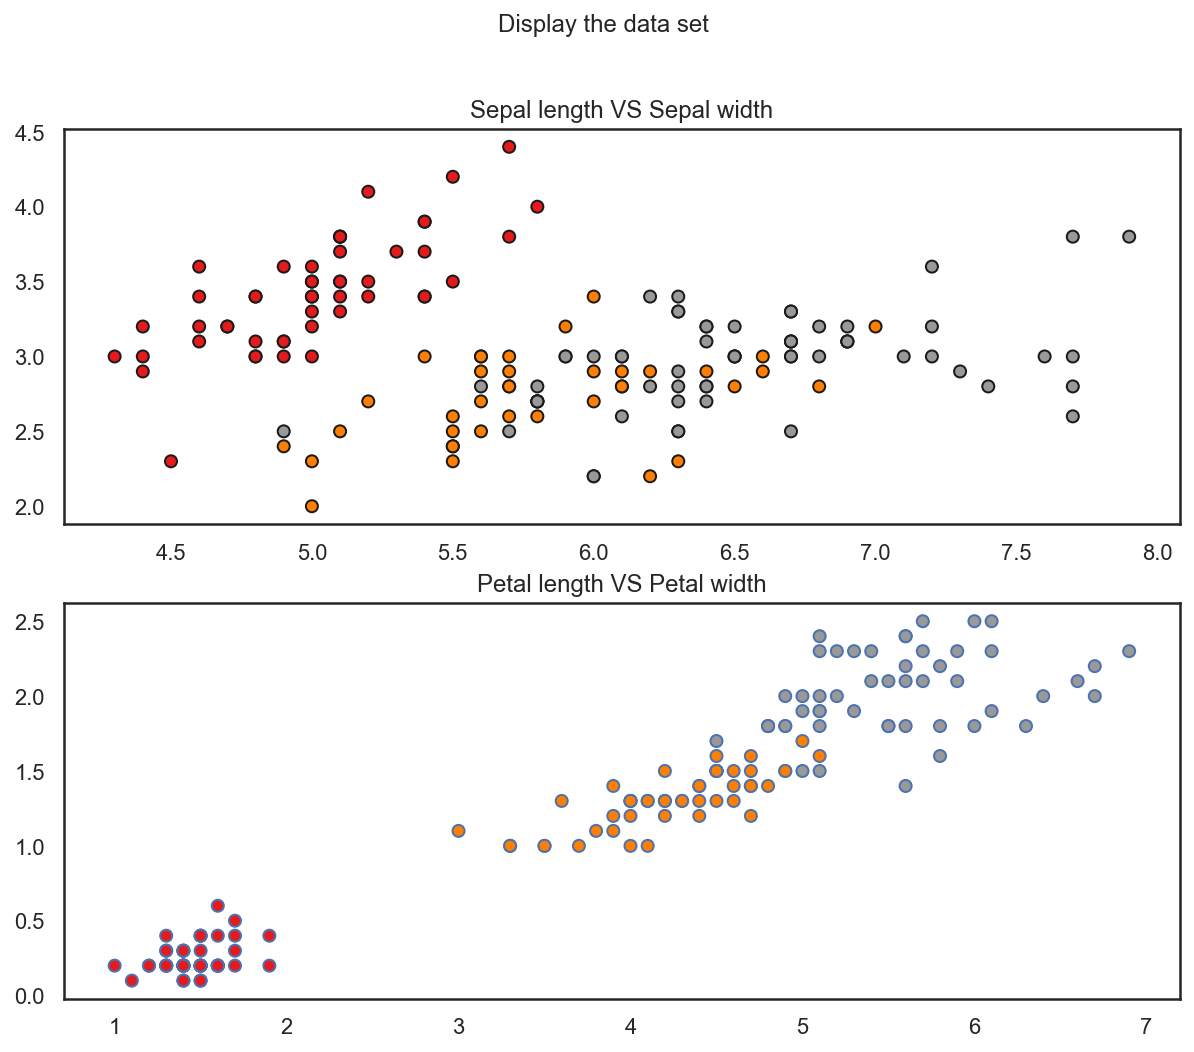

In [102]:
# Plot Sepal Length and Sepal Width
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.suptitle( "Display the data set")

ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
ax[0].set_title("Sepal length VS Sepal width")


ax[1].scatter(X[:,2],X[:,3],c=y,cmap=plt.cm.Set1,edgecolors="b")
ax[1].set_title("Petal length VS Petal width")



/var/folders/m2/79z4bx892nx4msmrz8qllplm0000gn/T/ipykernel_89155/3257627654.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/m2/79z4bx892nx4msmrz8qllplm0000gn/T/ipykernel_89155/3257627654.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_clr = np.choose(y, [1, 2, 0]).astype(np.f

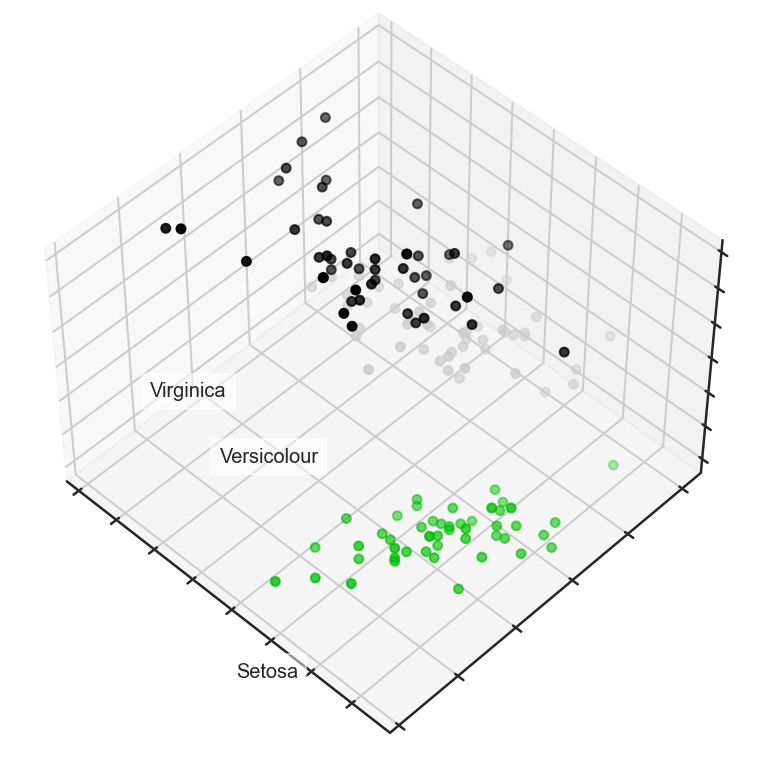

In [103]:
# Let's plot the data in 3d
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

We can see the data in three dimension space.  
Let's expore some other properties of the data.

### 3. Using Supervised learning method

First,we use the DecisionTreeClassifier to train the model.

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# splits the data into train and test set, the test size is 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=18)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=18)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.93333


The accuracy is more than 0.93,seems prety good.  
Let's use PCA

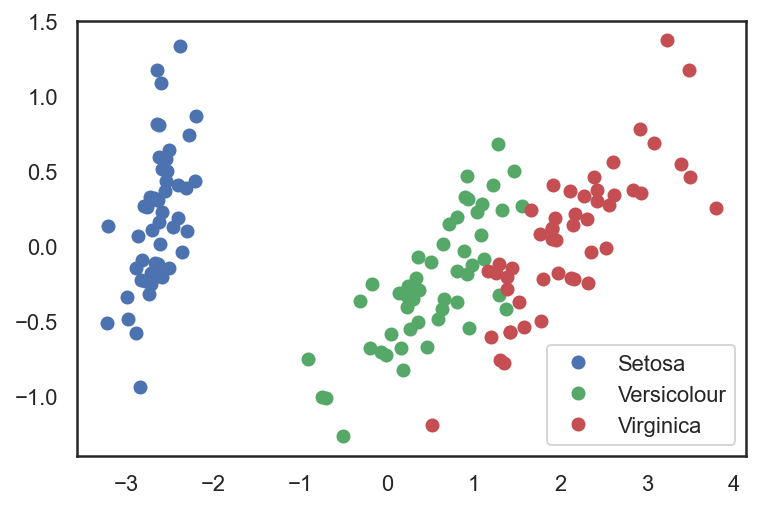

In [105]:
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [106]:
# split train and test set then apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=18)

clf = DecisionTreeClassifier(max_depth=2, random_state=18)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))


Accuracy: 0.88889


The accuracy did not increase in this case,but in other datasets with high dimension, PCA can drastically improve the accuracy.

Now let's see the unsupervised learning method.

### 4. Using Unsupervised learning method

Let's apply unsupervised learning method in this part.  
We use KMeans to train this model.

Actualy in most unpervised learning dataset we dont know the label, so we need to find the best cluster number.

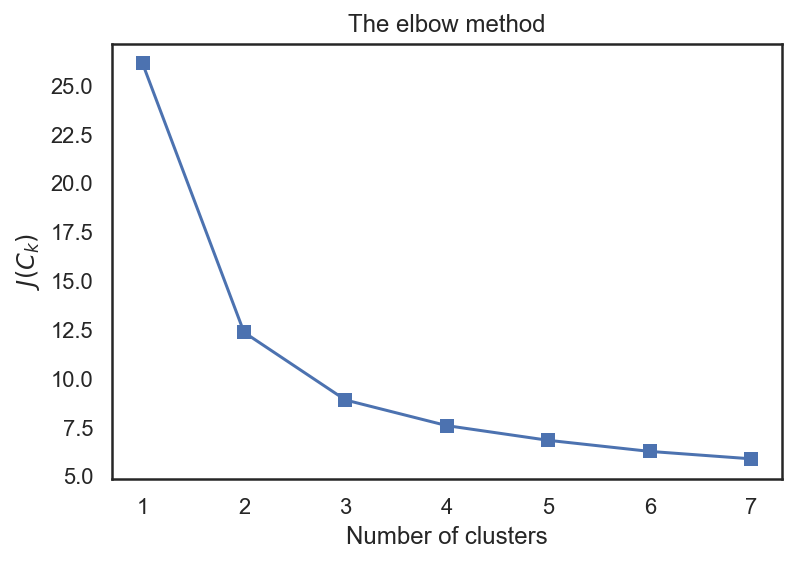

In [131]:
# Choosing the number of clusters for K-means  
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=18).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$');

In this case, when k=3 the $J(C_k)$ is drop insignificantly which means that the optimal number of cluster is 3. And we know the targe has 3 type of irises.

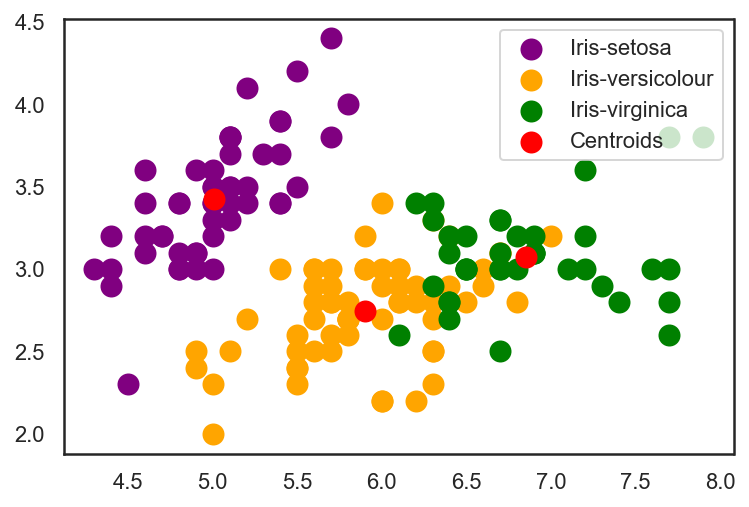

In [134]:
from sklearn.cluster import KMeans
# we use n_clusters = 3 , 

x = X
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 18)
y_pred = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()



Accuracy metrics  

In [135]:
# Let's check the result
import pandas as pd
pd.crosstab(y,y_pred)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [136]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [141]:
from sklearn.metrics.cluster import completeness_score
print("completeness_score:{:.5f}".format(completeness_score(y, y_pred)))

completeness_score:0.76499


### 5. Conclusion

In this task we use 2 different machine learning type to train the irises dataset. 
The DecisionTreeClassifier seem to have a good performance in this particular task. 
But the unsupervised learning can learn without label,its can classify most of the data in this task. In some other data analysis task unsupervised learning can use to reduce the dimension of features before apply other machine learning model.